### Import Libraries and upload dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv("C:\\Users\\NAVYA JYOTI\\Desktop\\New folder (2)\\Python_dataset\\credit risk modelling\\Cust_data.csv")
demo = pd.read_csv("C:\\Users\\NAVYA JYOTI\\Desktop\\New folder (2)\\Python_dataset\\credit risk modelling\\Cust_demo.csv")

### EDA

In [4]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149902 entries, 0 to 149901
Data columns (total 10 columns):
ID                                      149902 non-null int64
SeriousDlqin2yrs                        149902 non-null int64
RevolvingUtilizationOfUnsecuredLines    149902 non-null float64
NumberOfTime30_59DaysPastDueNotWorse    149902 non-null int64
DebtRatio                               149902 non-null float64
MonthlyIncome                           120191 non-null float64
NumberOfOpenCreditLinesAndLoans         149902 non-null int64
NumberOfTimes90DaysLate                 149902 non-null int64
NumberRealEstateLoansOrLines            149902 non-null int64
NumberOfTime60_89DaysPastDueNotWorse    149902 non-null int64
dtypes: float64(3), int64(7)
memory usage: 11.4 MB


In [5]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149956 entries, 0 to 149955
Data columns (total 8 columns):
ID                    149956 non-null int64
Location              149956 non-null object
Gender                149956 non-null int64
age                   149956 non-null int64
Martial_Status        149956 non-null object
NumberOfDependents    146033 non-null float64
Own_House             149956 non-null int64
No_Years_address      149956 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 9.2+ MB


In [6]:
#set the display to the maximum so that all columns with details are shown
pd.set_option('display.max_columns', None) 
dataset.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse
0,83236,0,0.311726,0,0.296409,11500.0,12,0,3,0
1,2503,0,0.124988,0,0.115903,14166.0,13,0,1,0
2,137013,0,0.060258,0,0.515147,6733.0,7,0,3,0
3,51306,0,0.064322,0,0.165127,13316.0,10,0,1,0
4,71937,0,0.211186,0,0.022283,2557.0,3,0,0,0


In [7]:
demo.head()

,ID,Location,Gender,age,Martial_Status,NumberOfDependents,Own_House,No_Years_address
0,4532,"Gandhinagar,Gujarat",0,39,Single,1.0,1,3
1,148736,"Hyderabad,Andhra Pradesh",0,52,Married,0.0,0,3
2,95965,"Shimla,Himachal Pradesh",0,62,Married,0.0,0,2
3,61759,"Srinagar,JK",0,42,Single,1.0,1,1
4,49806,"Imphal,Manipur",0,41,Single,1.0,0,3


### Contruct a new dataframe merging both dataset and demo

In [8]:
#make a new dataset merging both cust_data and cust_demo
customer = pd.merge(dataset, demo, how='inner', on=['ID'])
customer

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,Location,Gender,age,Martial_Status,NumberOfDependents,Own_House,No_Years_address
0,83236,0,0.311726,0,0.296409,11500.0,12,0,3,0,"Raipur,Chhattisgarh",0,46,Single,2.0,1,3
1,2503,0,0.124988,0,0.115903,14166.0,13,0,1,0,"Itanagar,Arunachal Pradesh",1,57,Single,2.0,0,3
2,137013,0,0.060258,0,0.515147,6733.0,7,0,3,0,"Chandigarh,Haryana",0,56,Married,0.0,1,1
3,51306,0,0.064322,0,0.165127,13316.0,10,0,1,0,"Aizawl,Mizoram",0,56,Single,2.0,0,1
4,71937,0,0.211186,0,0.022283,2557.0,3,0,0,0,"Chandigarh,Haryana",1,24,Single,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149853,148580,1,1.000000,1,0.021124,2650.0,0,0,0,1,"Kolkata,West Bengal",0,50,Single,0.0,0,1
149854,93517,0,0.163864,0,1.276108,1962.0,9,0,1,0,"Dehradun,Uttarakhand",0,46,Single,1.0,1,3
149855,15481,0,0.031732,0,0.260058,10016.0,12,0,1,0,"Chandigarh,Haryana",0,45,Single,0.0,0,3
149856,50464,0,0.078050,0,0.569960,1750.0,10,0,2,0,"Itanagar,Arunachal Pradesh",0,45,Single,0.0,0,1


In [9]:
#shows the number of rows and columns of a given DataFrame.
customer.shape

(149858, 17)

In [10]:
#drop the column 'ID'
customer = customer.drop('ID', axis='columns')

In [11]:
#split the column - 'Location' into city and state
customer[['City', 'State']] = customer.Location.str.split(',', expand = True)
customer.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,Location,Gender,age,Martial_Status,NumberOfDependents,Own_House,No_Years_address,City,State
0,0,0.311726,0,0.296409,11500.0,12,0,3,0,"Raipur,Chhattisgarh",0,46,Single,2.0,1,3,Raipur,Chhattisgarh
1,0,0.124988,0,0.115903,14166.0,13,0,1,0,"Itanagar,Arunachal Pradesh",1,57,Single,2.0,0,3,Itanagar,Arunachal Pradesh
2,0,0.060258,0,0.515147,6733.0,7,0,3,0,"Chandigarh,Haryana",0,56,Married,0.0,1,1,Chandigarh,Haryana
3,0,0.064322,0,0.165127,13316.0,10,0,1,0,"Aizawl,Mizoram",0,56,Single,2.0,0,1,Aizawl,Mizoram
4,0,0.211186,0,0.022283,2557.0,3,0,0,0,"Chandigarh,Haryana",1,24,Single,0.0,0,1,Chandigarh,Haryana


In [12]:
#now drop the column 'Location'
customer = customer.drop('Location', axis='columns')

In [13]:
#upload this edited dataset 'customer' to a new excel file
#customer.to_csv(r'C:\Users\NAVYA JYOTI\Desktop\New folder (2)\Python_dataset\customers.csv', index=False)

### Check missing values

In [14]:
#check nan values present in each features:
features_nan = [features for features in customer.columns if customer[features].isnull().sum()>1]

#print feature name with number of null values
for i in features_nan:
    print(i, customer[i].isnull().sum(), 'missing values')

MonthlyIncome 29707 missing values
NumberOfDependents 3921 missing values


In [15]:
#replace nan values to 0
customer = customer.replace(np.nan, 0) 

In [16]:
#numerical varidables
numerical_features = [feature for feature in customer.columns if customer[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
customer[numerical_features].head()

Number of numerical variables:  14


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,Gender,age,NumberOfDependents,Own_House,No_Years_address
0,0,0.311726,0,0.296409,11500.0,12,0,3,0,0,46,2.0,1,3
1,0,0.124988,0,0.115903,14166.0,13,0,1,0,1,57,2.0,0,3
2,0,0.060258,0,0.515147,6733.0,7,0,3,0,0,56,0.0,1,1
3,0,0.064322,0,0.165127,13316.0,10,0,1,0,0,56,2.0,0,1
4,0,0.211186,0,0.022283,2557.0,3,0,0,0,1,24,0.0,0,1


In [17]:
#Discrete variables
discrete_feature = [feature for feature in numerical_features if len(customer[feature].unique())<25 and ['ID']]
print("Count of Discrete Variables: {}".format(len(discrete_feature)))

Count of Discrete Variables: 8


In [18]:
discrete_feature

['SeriousDlqin2yrs',
 'NumberOfTime30_59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60_89DaysPastDueNotWorse',
 'Gender',
 'NumberOfDependents',
 'Own_House',
 'No_Years_address']

In [19]:
customer[discrete_feature].head()

,SeriousDlqin2yrs,NumberOfTime30_59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60_89DaysPastDueNotWorse,Gender,NumberOfDependents,Own_House,No_Years_address
0,0,0,0,0,0,2.0,1,3
1,0,0,0,0,1,2.0,0,3
2,0,0,0,0,0,0.0,1,1
3,0,0,0,0,0,2.0,0,1
4,0,0,0,0,1,0.0,0,1


# Data Visualization

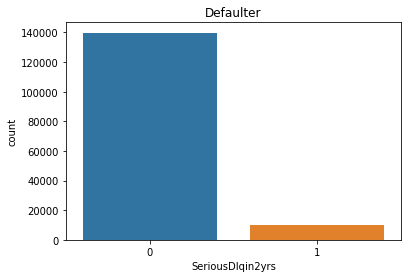

In [20]:
sns.countplot(x ='SeriousDlqin2yrs', data = customer)
plt.title('Defaulter')
plt.show()

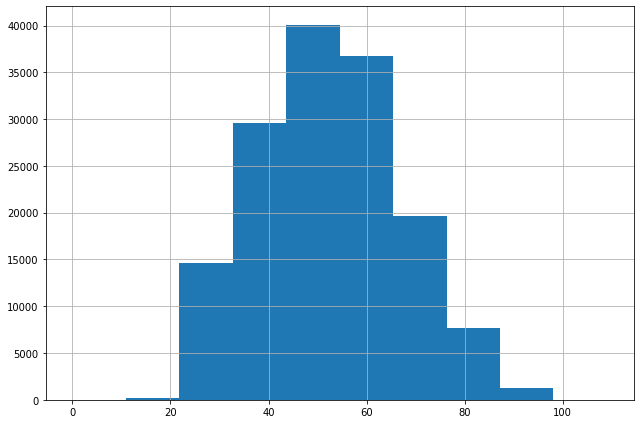

In [21]:
fig, axs = plt.subplots(1, 1,
                        figsize =(9, 6),
                        tight_layout = True)
customer['age'].hist(align='mid')
plt.show()

In [26]:
age_income=customer.groupby('age').agg({'MonthlyIncome':['sum']}).reset_index()

<Figure size 1800x720 with 0 Axes>

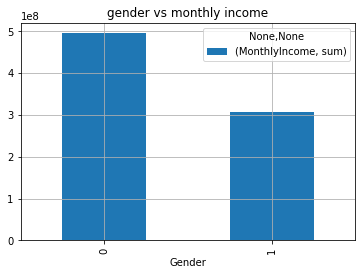

In [77]:
plt.figure(figsize=(25,10))
age_income1=customer.groupby(['Gender']).agg({'MonthlyIncome':['sum']})
age_income1.plot(kind='bar')
plt.title('gender vs monthly income')
plt.grid()
plt.show()

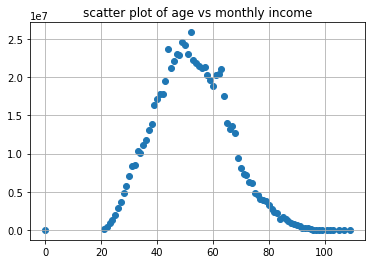

In [72]:
plt.scatter(data=age_income,x="age",y="MonthlyIncome")
plt.title('scatter plot of age vs monthly income')
plt.grid()
plt.show()

Text(0.5, 1.0, 'distribution plot of age')

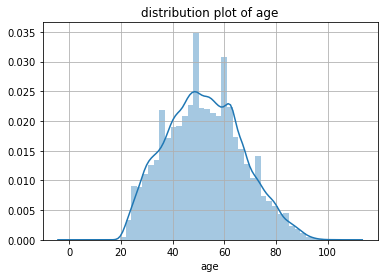

In [73]:
sns.distplot(customer['age'])
plt.grid()
plt.title('distribution plot of age')

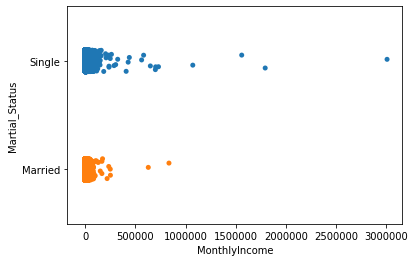

In [78]:
sns.stripplot(x=customer.MonthlyIncome, y=customer.Martial_Status)

## _One hot encoding_


In [38]:
#create a dummy dataset encoding all the categorical columns

categorical_col_updated = ['State','City','Martial_Status']
dummies = pd.get_dummies(customer, columns = categorical_col_updated) 

#save the file to a excel file
#dummies.to_csv(r'C:\Users\NAVYA JYOTI\Desktop\New folder (2)\Python_dataset\dummiesCu.csv', index=False)

dummies

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,Gender,age,NumberOfDependents,Own_House,No_Years_address,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_JK,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha(Orissa),State_Rajasthan,State_Sikkim,State_Tamil Nadu,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,City_Agartala,City_Aizawl,City_Bangalore,City_Bhopal,City_Bhubaneswar,City_Chandigarh,City_Chennai,City_Dehradun,City_Dispur,City_Gandhinagar,City_Gangtok,City_Hyderabad,City_Imphal,City_Itanagar,City_Jaipur,City_Jammu,City_Kohima,City_Kolkata,City_Lucknow,City_Mumbai,City_Panjim,City_Patna,City_Raipur,City_Ranchi,City_Shillong,City_Shimla,City_Srinagar,City_Thiruvananthapuram,Martial_Status_Married,Martial_Status_Single
0,0,0.311726,0,0.296409,11500.0,12,0,3,0,0,46,2.0,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0.124988,0,0.115903,14166.0,13,0,1,0,1,57,2.0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0.060258,0,0.515147,6733.0,7,0,3,0,0,56,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0.064322,0,0.165127,13316.0,10,0,1,0,0,56,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0.211186,0,0.022283,2557.0,3,0,0,0,1,24,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149853,1,1.000000,1,0.021124,2650.0,0,0,0,1,0,50,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
149854,0,0.163864,0,1.276108,1962.0,9,0,1,0,0,46,1.0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
149855,0,0.031732,0,0.260058,10016.0,12,0,1,0,0,45,0.0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
149856,0,0.078050,0,0.569960,1750.0,10,0,2,0,0,45,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
x = dummies.drop('SeriousDlqin2yrs', axis='columns') #dependent variable
y = dummies.SeriousDlqin2yrs #independent variable

## Handling Imbalanced dataset

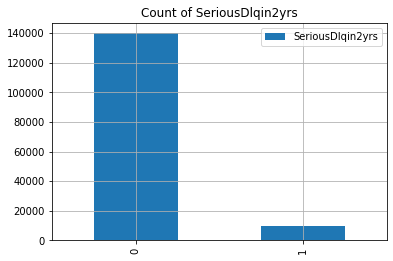

In [46]:
#cehck if the target variable has appropiate data
customer.SeriousDlqin2yrs.value_counts().plot(kind="bar")
plt.grid()
plt.title('Count of SeriousDlqin2yrs')
plt.legend()
plt.show()

In [47]:
#to check if it is imbalanced or not
y.value_counts() 

0    139843
1     10015
Name: SeriousDlqin2yrs, dtype: int64

In [48]:
# Printing number of samples in each class before Over-Sampling
t = [(d) for d in y if d==0]
s = [(d) for d in y if d==1]
print('Before Over-Sampling: ')
print('Samples in class 0: ',len(t))
print('Samples in class 1: ',len(s))

Before Over-Sampling: 
Samples in class 0:  139843
Samples in class 1:  10015


In [49]:
# Class count
class_0, class_1 = dummies['SeriousDlqin2yrs'].value_counts()

# Divide by class
class_0 = dummies[dummies['SeriousDlqin2yrs'] == 0]
class_1 = dummies[dummies['SeriousDlqin2yrs'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (139843, 71)
class 1: (10015, 71)


In [50]:
from sklearn.utils import resample
# Upsampling minority class
class_0_new = resample(class_1,
                             
                           # Upsample with replacement
                           replace=True,    
                             
                           # Number to match majority class
                           n_samples=100000,   
                           random_state=10)

In [51]:
# Combine majority and upsampled minority class
sample = pd.concat([class_0, class_0_new])

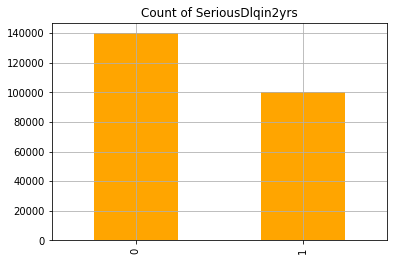

In [52]:
#graph shows if the dataset is now balanced or not
sample.SeriousDlqin2yrs.value_counts().plot(kind="bar",color="orange")
plt.title('Count of SeriousDlqin2yrs')
plt.grid()
plt.show()

In [53]:
# Display count of data points in both class
print(sample.SeriousDlqin2yrs.value_counts())

0    139843
1    100000
Name: SeriousDlqin2yrs, dtype: int64


In [54]:
sample.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,Gender,age,NumberOfDependents,Own_House,No_Years_address,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_JK,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha(Orissa),State_Rajasthan,State_Sikkim,State_Tamil Nadu,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,City_Agartala,City_Aizawl,City_Bangalore,City_Bhopal,City_Bhubaneswar,City_Chandigarh,City_Chennai,City_Dehradun,City_Dispur,City_Gandhinagar,City_Gangtok,City_Hyderabad,City_Imphal,City_Itanagar,City_Jaipur,City_Jammu,City_Kohima,City_Kolkata,City_Lucknow,City_Mumbai,City_Panjim,City_Patna,City_Raipur,City_Ranchi,City_Shillong,City_Shimla,City_Srinagar,City_Thiruvananthapuram,Martial_Status_Married,Martial_Status_Single
0,0,0.311726,0,0.296409,11500.0,12,0,3,0,0,46,2.0,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0.124988,0,0.115903,14166.0,13,0,1,0,1,57,2.0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0.060258,0,0.515147,6733.0,7,0,3,0,0,56,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0.064322,0,0.165127,13316.0,10,0,1,0,0,56,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0.211186,0,0.022283,2557.0,3,0,0,0,1,24,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### declare x and y variables

In [55]:
# independent variables
x  = sample.drop('SeriousDlqin2yrs', axis='columns')
x

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,Gender,age,NumberOfDependents,Own_House,No_Years_address,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_JK,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha(Orissa),State_Rajasthan,State_Sikkim,State_Tamil Nadu,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,City_Agartala,City_Aizawl,City_Bangalore,City_Bhopal,City_Bhubaneswar,City_Chandigarh,City_Chennai,City_Dehradun,City_Dispur,City_Gandhinagar,City_Gangtok,City_Hyderabad,City_Imphal,City_Itanagar,City_Jaipur,City_Jammu,City_Kohima,City_Kolkata,City_Lucknow,City_Mumbai,City_Panjim,City_Patna,City_Raipur,City_Ranchi,City_Shillong,City_Shimla,City_Srinagar,City_Thiruvananthapuram,Martial_Status_Married,Martial_Status_Single
0,0.311726,0,0.296409,11500.0,12,0,3,0,0,46,2.0,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.124988,0,0.115903,14166.0,13,0,1,0,1,57,2.0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.060258,0,0.515147,6733.0,7,0,3,0,0,56,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.064322,0,0.165127,13316.0,10,0,1,0,0,56,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.211186,0,0.022283,2557.0,3,0,0,0,1,24,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126558,0.987958,0,10527.000000,0.0,12,0,5,0,0,55,1.0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
119606,0.272048,1,6635.000000,0.0,10,0,6,0,1,54,0.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
44679,0.138129,0,0.455682,14000.0,16,0,3,0,1,40,0.0,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
132058,1.000000,1,0.299729,4800.0,5,2,1,0,0,36,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [56]:
y = sample['SeriousDlqin2yrs']
y

0         0
1         0
2         0
3         0
4         0
         ..
126558    1
119606    1
44679     1
132058    1
44226     1
Name: SeriousDlqin2yrs, Length: 239843, dtype: int64

In [57]:
#splitting the dataset into training and test set 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7)

In [58]:
X_train.shape, X_test.shape

((191874, 70), (47969, 70))

In [59]:
X_train.isnull().any()

RevolvingUtilizationOfUnsecuredLines    False
NumberOfTime30_59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                           False
NumberOfOpenCreditLinesAndLoans         False
                                        ...  
City_Shimla                             False
City_Srinagar                           False
City_Thiruvananthapuram                 False
Martial_Status_Married                  False
Martial_Status_Single                   False
Length: 70, dtype: bool

# Random Forest Classifier

### 1. Random Forest Classifier model with default parameters ¶

In [60]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [61]:
# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9866


### 2. Random Forest Classifier model with parameter n_estimators = 70 ¶

In [62]:
# instantiate the classifier with n_estimators = 100
rfc2 = RandomForestClassifier(n_estimators=70, random_state=7)

# fit the model to the training set
rfc2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [63]:
print(rfc2.score(X_train,y_train))

0.9999947882464534


In [64]:
#Predict on the test set results
y_pred_100 = rfc2.predict(X_test)

#Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))


Model accuracy score with 100 decision-trees : 0.9864


In [65]:
rfc2.score(X_test,y_test)

0.9863661948341638

### Hyperparameter tuning

In [ ]:
#import the related libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
#initialise the parameters
param_grid = { 
    'n_estimators': [20, 50, 70],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [5,7,9],
    'criterion' :['gini', 'entropy'],
    'bootstrap' :[True, False]
}

In [ ]:
#initialise random forest classifier again
rfc3=RandomForestClassifier()

In [114]:
#apply grid search CV
CV_rfc = GridSearchCV(estimator=rfc3, param_grid=param_grid, cv= 5,n_jobs=-1,verbose=1)

In [115]:
CV_rfc.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 20.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [116]:
#check for the best parameters to get the highest accuracy
CV_rfc.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [280]:
#applying the best parameters in our RF algorithm
rfc = RandomForestClassifier(criterion="entropy",max_depth=9,max_features='sqrt',n_estimators=50,bootstrap=True)
    
rfc.fit(X_train,y_train)
print("Train Score", rfc.score(X_train,y_train))
print("Test Score", rfc.score(X_test,y_test))

Train Score 0.7946516985104808
Test Score 0.7929079196981383


## Save the model using a pickle file 

In [281]:
import pickle

In [282]:
# Save the Model to file in the current working directory
filename = 'finalized_model.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [285]:
# Load the Model back from file
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Use the Reloaded Model to Calculate the accuracy score and predict target values


In [287]:
# Calculate the Score 
score = loaded_model.score(X_test, y_test)
# Print the Score
print("Test score: {0:.2f} %".format(100 * score)) 

Test score: 79.29 %


In [288]:
# Predict the Labels using the reloaded Model
Ypredict = loaded_model.predict(X_test)  

Ypredict

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

# Predicting the Data

Example 1:

In [122]:
check1 = pd.read_excel("C:\\Users\\NAVYA JYOTI\\Desktop\\New folder (2)\\Python_dataset\\check1.xlsx")
check1.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,Gender,age,NumberOfDependents,Own_House,No_Years_address,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_JK,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha(Orissa),State_Rajasthan,State_Sikkim,State_Tamil Nadu,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,City_Agartala,City_Aizawl,City_Bangalore,City_Bhopal,City_Bhubaneswar,City_Chandigarh,City_Chennai,City_Dehradun,City_Dispur,City_Gandhinagar,City_Gangtok,City_Hyderabad,City_Imphal,City_Itanagar,City_Jaipur,City_Jammu,City_Kohima,City_Kolkata,City_Lucknow,City_Mumbai,City_Panjim,City_Patna,City_Raipur,City_Ranchi,City_Shillong,City_Shimla,City_Srinagar,City_Thiruvananthapuram,Martial_Status_Married,Martial_Status_Single
0,1.000000,0,40.000000,0,4,6,0,0,1,29,0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.694820,1,1.858451,1200,15,0,1,0,0,57,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.120723,0,1.220356,5000,8,0,2,2,0,30,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.034524,2,0.108789,10000,8,0,0,0,0,57,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.892611,6,2487.000000,0,14,0,2,4,1,50,0,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [123]:
check1.isnull().values.sum()

0

In [124]:
a = rfc.predict_proba(check1)
a

array([[0.23077126, 0.76922874],
       [0.38380906, 0.61619094],
       [0.27132145, 0.72867855],
       [0.58467394, 0.41532606],
       [0.14543476, 0.85456524],
       [0.75704374, 0.24295626],
       [0.17139446, 0.82860554],
       [0.74793148, 0.25206852],
       [0.39183043, 0.60816957],
       [0.08311328, 0.91688672],
       [0.41986008, 0.58013992],
       [0.25682286, 0.74317714]])

In [125]:
#Predict on the example
pred1 = rfc.predict(check1)

In [126]:
pred1

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [128]:
check_pred = pd.DataFrame()
check_pred = check1
check_pred['Predicted value'] = pred1

In [188]:
# check_pred.to_csv(r'C:\Users\NAVYA JYOTI\Desktop\New folder (2)\Python_dataset\results.csv', index=False)

Example 2:

In [130]:
check2 = pd.read_excel("C:\\Users\\NAVYA JYOTI\\Desktop\\New folder (2)\\Python_dataset\\check2.xlsx")
check2.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,Gender,age,NumberOfDependents,Own_House,No_Years_address,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_JK,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha(Orissa),State_Rajasthan,State_Sikkim,State_Tamil Nadu,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,City_Agartala,City_Aizawl,City_Bangalore,City_Bhopal,City_Bhubaneswar,City_Chandigarh,City_Chennai,City_Dehradun,City_Dispur,City_Gandhinagar,City_Gangtok,City_Hyderabad,City_Imphal,City_Itanagar,City_Jaipur,City_Jammu,City_Kohima,City_Kolkata,City_Lucknow,City_Mumbai,City_Panjim,City_Patna,City_Raipur,City_Ranchi,City_Shillong,City_Shimla,City_Srinagar,City_Thiruvananthapuram,Martial_Status_Married,Martial_Status_Single
0,0.311726,0,0.296409,11500,12,0,3,0,0,46,2,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.124988,0,0.115903,14166,13,0,1,0,1,57,2,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.060258,0,0.515147,6733,7,0,3,0,0,56,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.064322,0,0.165127,13316,10,0,1,0,0,56,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.211186,0,0.022283,2557,3,0,0,0,1,24,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [131]:
check2.isnull().values.sum()

0

In [133]:
b = rfc.predict_proba(check2)
b

array([[0.78936419, 0.21063581],
       [0.8423488 , 0.1576512 ],
       [0.82298309, 0.17701691],
       [0.8665859 , 0.1334141 ],
       [0.79480029, 0.20519971],
       [0.80236551, 0.19763449],
       [0.80338869, 0.19661131],
       [0.83525315, 0.16474685],
       [0.86589837, 0.13410163],
       [0.88052636, 0.11947364],
       [0.74984965, 0.25015035],
       [0.8532366 , 0.1467634 ]])

In [134]:
#Predict on the example
pred2 = rfc.predict(check2)

In [135]:
pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [136]:
check_pred2 = pd.DataFrame()
check_pred2 = check2
check_pred2['Predicted value'] = pred2

Example 3:

In [150]:
check3 = pd.read_excel("C:\\Users\\NAVYA JYOTI\\Desktop\\New folder (2)\\Python_dataset\\check3.xlsx")
check3.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,Gender,age,NumberOfDependents,Own_House,No_Years_address,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_JK,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha(Orissa),State_Rajasthan,State_Sikkim,State_Tamil Nadu,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,City_Agartala,City_Aizawl,City_Bangalore,City_Bhopal,City_Bhubaneswar,City_Chandigarh,City_Chennai,City_Dehradun,City_Dispur,City_Gandhinagar,City_Gangtok,City_Hyderabad,City_Imphal,City_Itanagar,City_Jaipur,City_Jammu,City_Kohima,City_Kolkata,City_Lucknow,City_Mumbai,City_Panjim,City_Patna,City_Raipur,City_Ranchi,City_Shillong,City_Shimla,City_Srinagar,City_Thiruvananthapuram,Martial_Status_Married,Martial_Status_Single
0,0.311726,0,0.296409,11500,12,0,3,0,0,46,2,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.124988,0,0.115903,14166,13,0,1,0,1,57,2,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.060258,0,0.515147,6733,7,0,3,0,0,56,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.064322,0,0.165127,13316,10,0,1,0,0,56,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.211186,0,0.022283,2557,3,0,0,0,1,24,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [151]:
#predict
pred3 = rfc.predict(check3)

In [152]:
pred3

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [154]:
check_pred3 = pd.DataFrame()
check_pred3 = check3
check_pred3['Predicted value'] = pred3

In [155]:
check_pred3.to_csv(r'C:\Users\NAVYA JYOTI\Desktop\New folder (2)\Python_dataset\results2.csv', index=False)

## Creating the Confusion matrix  

In [138]:
#import the necessary libraries
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

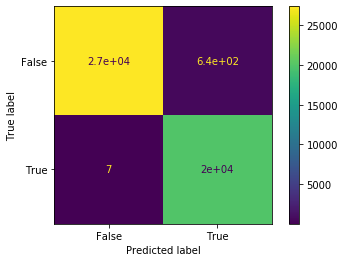

In [139]:
#display the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [140]:
# Check precision score 
print('Model precision score with 10 decision-trees : {0:0.4f}'. format(metrics.precision_score(y_test, y_pred)))

Model precision score with 10 decision-trees : 0.9691


In [141]:
# Check sensitivity (recall) score 
print('Model recall score with 10 decision-trees : {0:0.4f}'. format(metrics.recall_score(y_test, y_pred)))

Model recall score with 10 decision-trees : 0.9996


In [142]:
# Check Specificity score 
print('Model specifity score with 10 decision-trees : {0:0.4f}'. format(metrics.recall_score(y_test, y_pred, pos_label=0)))

Model specifity score with 10 decision-trees : 0.9773


In [143]:
# Check f1 score 
print('Model f1 score with 10 decision-trees : {0:0.4f}'. format(metrics.f1_score(y_test, y_pred, pos_label=0)))

Model f1 score with 10 decision-trees : 0.9884


In [144]:
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9866


### Classification Report

In [145]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     28024
           1       0.97      1.00      0.98     19945

    accuracy                           0.99     47969
   macro avg       0.98      0.99      0.99     47969
weighted avg       0.99      0.99      0.99     47969

